**Import Libraries**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

**Import Dataset**

In [46]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [48]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [49]:
# Creating dummy vairables 
df_D=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)
df_D

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [50]:
# Changing Object into Categorical
df_D['ShelveLoc']=df_D['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [51]:
df_D.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0


In [52]:
x=df.iloc[:,0:6]
y=df_D['ShelveLoc']

In [53]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [54]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [55]:
df_D['ShelveLoc'].unique()

array([3, 1, 2])

In [56]:
df_D['ShelveLoc'].value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [57]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

# Decision Tree (C5.0)

# Building Decision Tree Classifier Using Entropy Criteria

In [58]:
# Pruning the Decision Tree
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

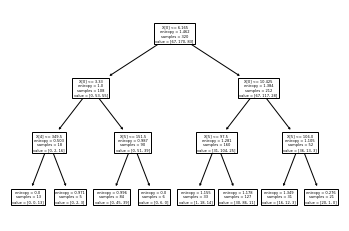

In [59]:
# PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

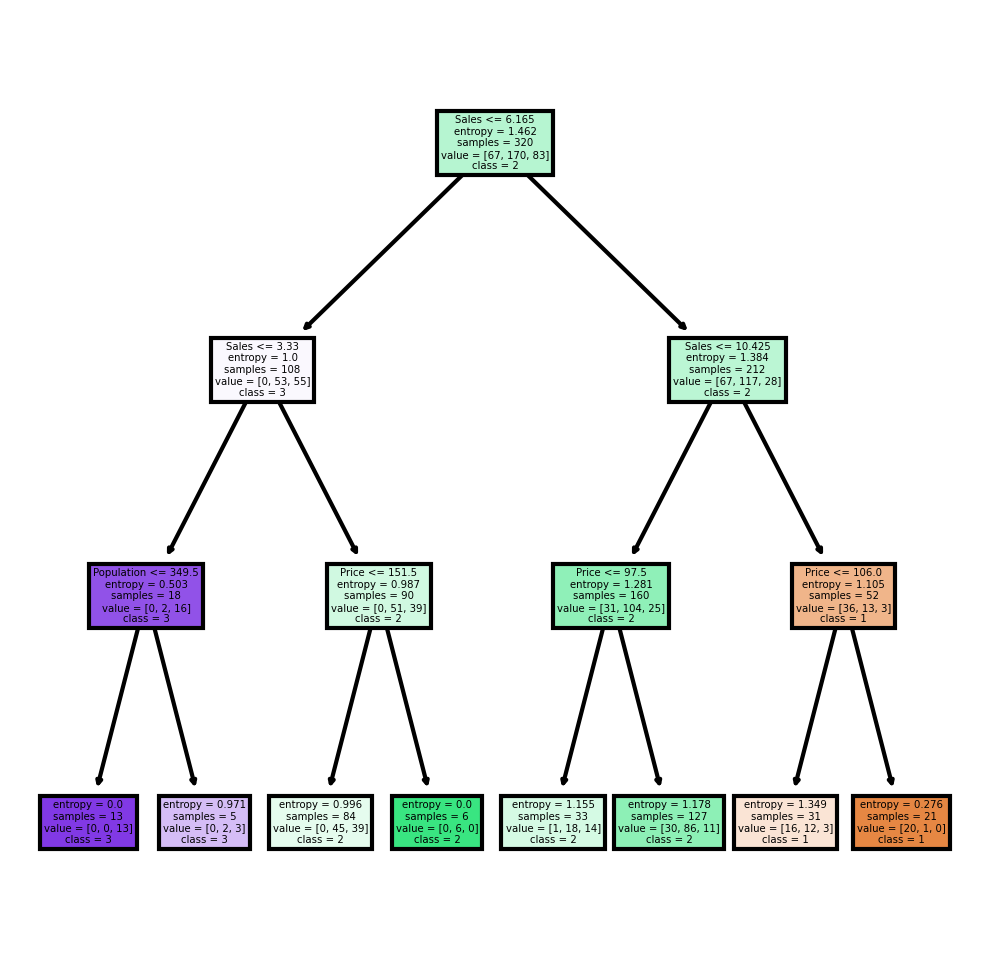

In [60]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['1', '2', '3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [61]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_0 <= 6.16
|   |--- feature_0 <= 3.33
|   |   |--- feature_4 <= 349.50
|   |   |   |--- class: 3
|   |   |--- feature_4 >  349.50
|   |   |   |--- class: 3
|   |--- feature_0 >  3.33
|   |   |--- feature_5 <= 151.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  151.50
|   |   |   |--- class: 2
|--- feature_0 >  6.16
|   |--- feature_0 <= 10.42
|   |   |--- feature_5 <= 97.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  97.50
|   |   |   |--- class: 2
|   |--- feature_0 >  10.42
|   |   |--- feature_5 <= 106.00
|   |   |   |--- class: 1
|   |   |--- feature_5 >  106.00
|   |   |   |--- class: 1



In [62]:
model.feature_importances_ 

array([0.74692591, 0.        , 0.        , 0.        , 0.02920061,
       0.22387348])

In [63]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.746926
Price          0.223873
Population     0.029201
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
dtype: float64

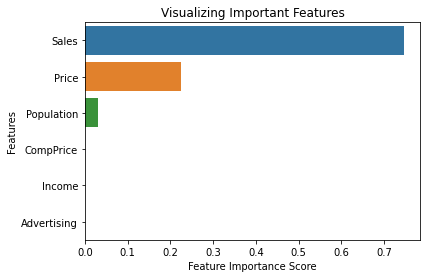

In [64]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [65]:
# Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

2    63
1    13
3     4
dtype: int64

In [66]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2])

In [67]:
# Getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,1,2,3
ShelveLoc,,,
1,8,10,0
2,5,41,3
3,0,12,1


In [68]:
# Accuracy 
np.mean(preds==y_test)

0.625

# Decision Tree (CART)

# Building Decision Tree Classifier Using Gini Criteria

In [69]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [70]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [71]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In [72]:
model.feature_importances_ 

array([0.74692591, 0.        , 0.        , 0.        , 0.02920061,
       0.22387348])

# Building Decision Tree Regression Criteria

In [73]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor  

In [74]:
array = df_D.values
X = array[:,0:3]
y = array[:,3]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)   

In [76]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train) 

DecisionTreeRegressor(max_depth=3)

In [77]:
#Find the training accuracy
model.score(X_train, y_train)  

0.21097311679313258

In [78]:
#Find the testing accuracy
model.score(X_test,y_test)

-0.10772791704344242

# Random Forests Ensembling Model

In [79]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [82]:
X = array[:,0:3]
y = array[:,3]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.2425


**Hence, the Accuracy improved from the previous one's by applying an Ensemble Model**